# Credit Card Users Analysis

### What is the purpose of the analysis?
To explore the `sd254_users.csv` dataset, understand user behavior and profiles, and perform descriptive analysis.

### Why is it relevant?
Studying user data helps uncover patterns that may relate to financial habits.

### Where did we get the data from?
The dataset is part of the Kaggle project: [Credit Card Transactions Dataset](https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions)

### Who is the target audience?
Data analysts, data science learners, financial researchers, and professionals interested in user profiling and fraud prevention strategies.


# Importing the Data

In [1]:
import pandas as pd
users = pd.read_csv('../data/raw/sd254_users.csv')

In [2]:
users.shape

(2000, 18)

In [3]:
users.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


# Counting the duplicated rows

In [4]:
# Counts the duplicated rows
print(users.duplicated().sum())

0


# Counting the number of missing values

In [5]:
# Counts the number of missing values
print(users.isnull().sum())

Person                            0
Current Age                       0
Retirement Age                    0
Birth Year                        0
Birth Month                       0
Gender                            0
Address                           0
Apartment                      1472
City                              0
State                             0
Zipcode                           0
Latitude                          0
Longitude                         0
Per Capita Income - Zipcode       0
Yearly Income - Person            0
Total Debt                        0
FICO Score                        0
Num Credit Cards                  0
dtype: int64


# Dropping the column full of missing values
We are dropping the `Apartment` column because it contains mostly null values

In [6]:
users = users.drop('Apartment', axis=1)
users.isnull().sum()

Person                         0
Current Age                    0
Retirement Age                 0
Birth Year                     0
Birth Month                    0
Gender                         0
Address                        0
City                           0
State                          0
Zipcode                        0
Latitude                       0
Longitude                      0
Per Capita Income - Zipcode    0
Yearly Income - Person         0
Total Debt                     0
FICO Score                     0
Num Credit Cards               0
dtype: int64

In [7]:
users.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


# Inspecting columns type

In [8]:
users.dtypes

Person                          object
Current Age                      int64
Retirement Age                   int64
Birth Year                       int64
Birth Month                      int64
Gender                          object
Address                         object
City                            object
State                           object
Zipcode                          int64
Latitude                       float64
Longitude                      float64
Per Capita Income - Zipcode     object
Yearly Income - Person          object
Total Debt                      object
FICO Score                       int64
Num Credit Cards                 int64
dtype: object

### Observation
The columns  
`Per Capita Income - Zipcode`  
`Yearly Income - Person`        
`Total Debt`  
Contains numeric values stored as object type

`Zipcode` is a categorical variable stored as int

# Converting columns to float
We will convert these columns to thier appropriate types

In [9]:
# targeted columns 
cols = ['Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt']

# for each columns tagreted
for col in cols :
    # we remove the $ sign and convert it the values to float
    users[col] = users[col].str.replace('$', '').astype(float)

users = users.rename(columns={
    'Per Capita Income - Zipcode': 'avg_income_usd_by_zipcode',
    'Yearly Income - Person': 'annual_income_usd_per_person',
    'Total Debt': 'total_debt_usd'
})

users['Zipcode'] = users['Zipcode'].astype(str)
users.dtypes

Person                           object
Current Age                       int64
Retirement Age                    int64
Birth Year                        int64
Birth Month                       int64
Gender                           object
Address                          object
City                             object
State                            object
Zipcode                          object
Latitude                        float64
Longitude                       float64
avg_income_usd_by_zipcode       float64
annual_income_usd_per_person    float64
total_debt_usd                  float64
FICO Score                        int64
Num Credit Cards                  int64
dtype: object

In [10]:
users.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,City,State,Zipcode,Latitude,Longitude,avg_income_usd_by_zipcode,annual_income_usd_per_person,total_debt_usd,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,Little Neck,NY,11363,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,West Covina,CA,91792,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,New York,NY,10069,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,San Francisco,CA,94117,37.76,-122.44,53797.0,109687.0,183855.0,675,1


# Inspecting the numerical values one by one

In [11]:
users.describe()

,Current Age,Retirement Age,Birth Year,Birth Month,Latitude,Longitude,avg_income_usd_by_zipcode,annual_income_usd_per_person,total_debt_usd,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,20581.000000,40744.500000,58251.000000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,26286.000000,52698.500000,89070.500000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,163145.000000,307018.000000,516263.000000,850.000000,9.000000


The mode : 18


<Axes: >

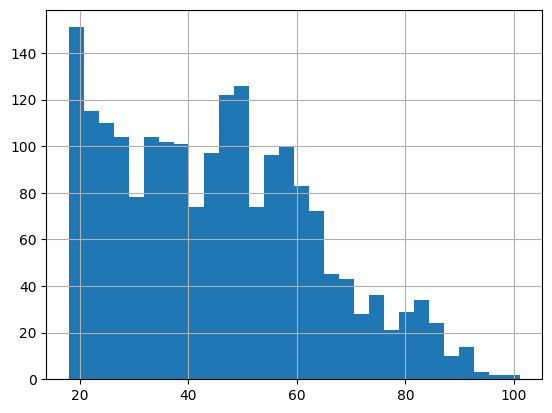

In [28]:
print('The mode :', users['Current Age'].mode()[0])

users['Current Age'].hist(bins=30)

### Observations
The most common age among users is 18 years old.
The age distribution is right-skewed, with a higher concentration of younger users and a gradual decrease as age increases.

<Axes: >

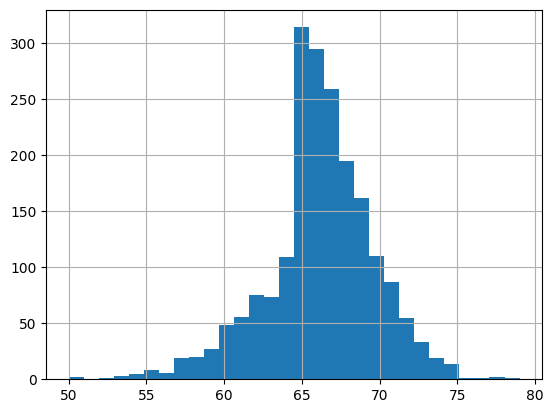

In [29]:
users['Retirement Age'].hist(bins=30)

### Observations
Most users retire between 64 and 67 years old. The age distribution is left-skewed.

<Axes: >

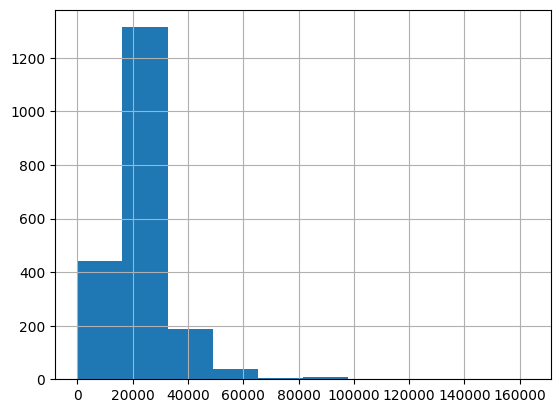

In [27]:
users['avg_income_usd_by_zipcode'].hist()

<Axes: >

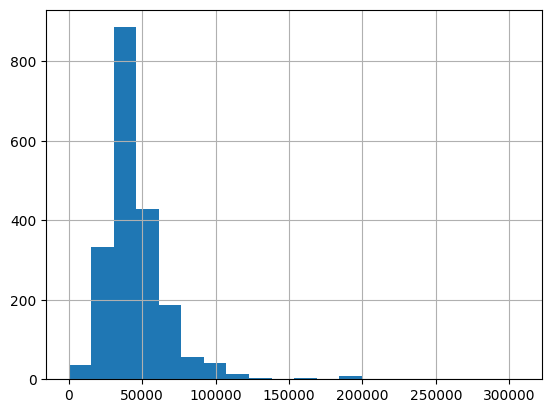

In [30]:
users['annual_income_usd_per_person'].hist(bins=20)

### Observations
Most users have an annual income slightly below 50,000USD. The distribution is right-skewed, with fewer people earning more than 100,000USD per year.

<Axes: >

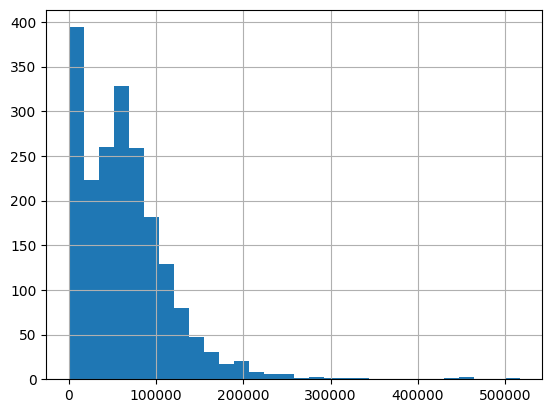

In [34]:
users['total_debt_usd'].hist(bins=30)

### Observations
Right-skewed histogram showing most users have debt under 100kUSD, with peak frequency around 0-50kUSD. Few outliers extend beyond 300kUSD.

<Axes: >

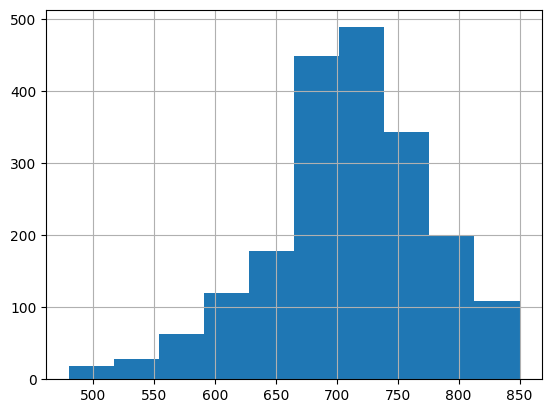

In [32]:
users['FICO Score'].hist()

<Axes: >

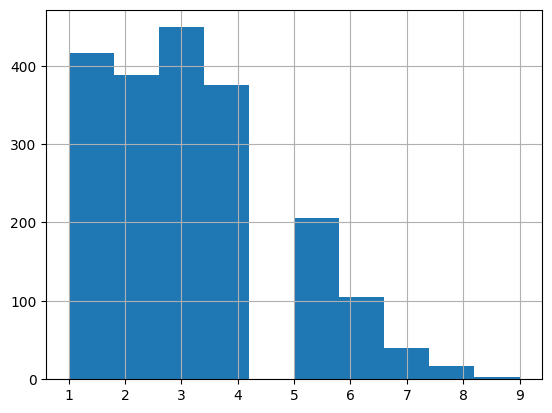

In [17]:
users['Num Credit Cards'].hist()

# Looking for correlations

In [18]:
users.corr(numeric_only=True)

,Current Age,Retirement Age,Birth Year,Birth Month,Latitude,Longitude,avg_income_usd_by_zipcode,annual_income_usd_per_person,total_debt_usd,FICO Score,Num Credit Cards
Current Age,1.000000,0.004814,-0.999769,0.008117,-0.032878,-0.009111,-0.009054,-0.114316,-0.315443,-0.005468,0.484189
Retirement Age,0.004814,1.000000,-0.005548,0.019351,-0.004381,-0.014067,0.004605,0.021506,-0.043371,0.172668,0.158896
Birth Year,-0.999769,-0.005548,1.000000,-0.022729,0.032943,0.008900,0.008968,0.113853,0.315195,0.006187,-0.484439
Birth Month,0.008117,0.019351,-0.022729,1.000000,-0.011893,-0.024521,-0.019579,-0.013205,-0.001946,-0.019810,0.014902
Latitude,-0.032878,-0.004381,0.032943,-0.011893,1.000000,0.123507,0.121343,0.121702,0.057084,0.034816,-0.027350
Longitude,-0.009111,-0.014067,0.008900,-0.024521,0.123507,1.000000,0.029938,0.041168,-0.000222,0.005879,-0.028451
avg_income_usd_by_zipcode,-0.009054,0.004605,0.008968,-0.019579,0.121343,0.029938,1.000000,0.963975,0.496138,-0.004545,0.018606
annual_income_usd_per_person,-0.114316,0.021506,0.113853,-0.013205,0.121702,0.041168,0.963975,1.000000,0.550641,0.000167,-0.032877
total_debt_usd,-0.315443,-0.043371,0.315195,-0.001946,0.057084,-0.000222,0.496138,0.550641,1.000000,-0.104537,-0.217940
FICO Score,-0.005468,0.172668,0.006187,-0.019810,0.034816,0.005879,-0.004545,0.000167,-0.104537,1.000000,0.237935


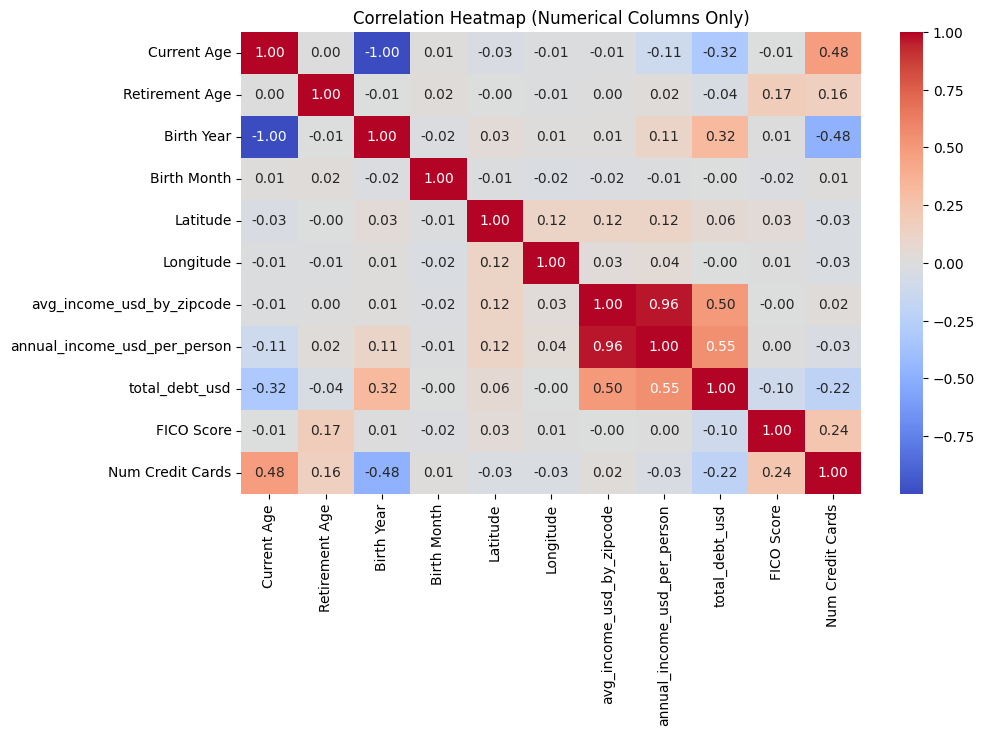

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(users.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

# Key Correlations & Hypotheses

- Strong correlation (0.96) between `zipcode income` and `personal income`: People likely live in areas matching their income level
- Moderate positive correlations (0.50-0.55) between `total debt` and `income metrics`: Higher earners may have more access to credit
- `Current Age` positively correlated (0.48) with `Number of Credit Cards`: Credit access may increase with age
- `FICO Score` negatively correlated (-0.10) with `total debt`: Lower debt potentially contributes to better credit scores